In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
tfds.list_builders()
build = tfds.builder("mnist")
info = build.info
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

## Loading the data



In [ ]:
train_ds = tfds.load(name="mnist", split='train')
test_ds = tfds.load(name='mnist', split='test')

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


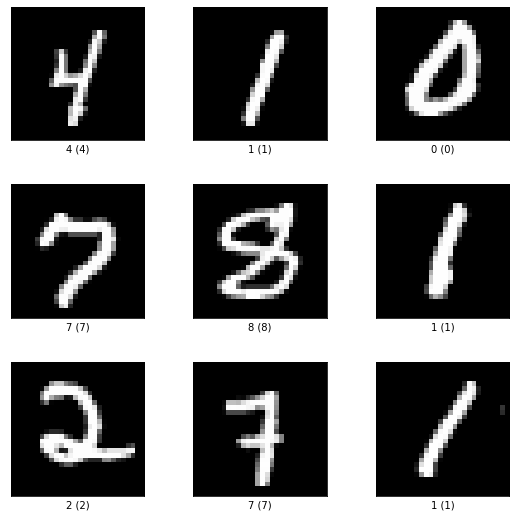

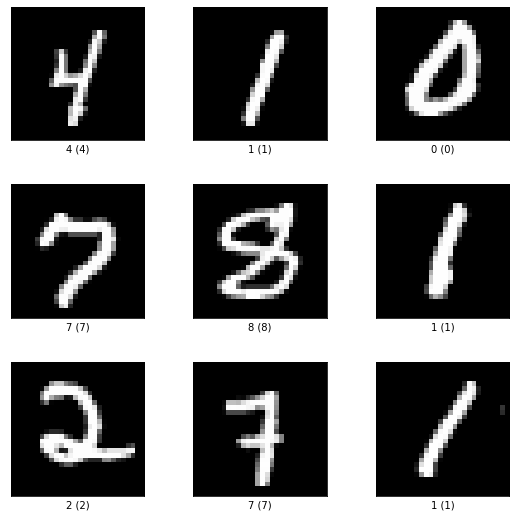

In [ ]:
tfds.show_examples(info, train_ds)

## Prep the data

In [ ]:
train_image = np.array([example['image'].numpy() for example in train_ds])
train_label = np.array([example['label'].numpy() for example in train_ds])

test_image = np.array([example['image'].numpy() for example in test_ds])
test_label = np.array([example['label'].numpy() for example in test_ds])



In [ ]:
train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

train_image /= 255
test_image /= 255
np.unique(train_label)
type(train_label[9])

numpy.int64

## Basic Model

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(train_image, train_label, batch_size=32, epochs=10)
print('Evaluation')
model.evaluate(test_image, test_label)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1975 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0840 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

[0.12104743719100952, 0.9776999950408936]

## Convolutional Network

In [ ]:
model = keras.Sequential([keras.layers.AveragePooling2D(pool_size=4, strides=2, input_shape=(28,28,1)),
                          keras.layers.Conv2D(64, 4, activation='relu'),
                          keras.layers.Conv2D(32, 4, activation='relu'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(train_image, train_label, batch_size=32, epochs=10)
print('Evaluation')
model.evaluate(test_image, test_label)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2040 - accuracy: 0.9381
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0171 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

[0.04039093479514122, 0.9869999885559082]

## Saving the Model

In [ ]:
model.save('/models/mnist')
model.save_weights('/models/mnist_w')
model.evaluate(test_image,test_label)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /models/mnist/assets


INFO:tensorflow:Assets written to: /models/mnist/assets


313/313 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9870


[0.04039093479514122, 0.9869999885559082]

## Loading the Model

In [ ]:
loaded_model = keras.models.load_model("/models/mnist")
loaded_model.load_weights('/models/mnist_w')
loaded_model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
loaded_model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0484 - accuracy: 0.9866


[0.04838544502854347, 0.9865999817848206]

In [ ]:
np.round(loaded_model.predict(test_image[45].reshape(1,28,28,1)))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_label[45]

2

## Saving the model in google drive

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model.save("/content/gdrive/My Drive/models/mnist")
model.save_weights("/content/gdrive/My Drive/models/mnist_w")

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/models/mnist/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/models/mnist/assets
